# Mini Project 1 
This dataset contains information on the insurance claim. each observation is different 
policyholder with various features like the age of the person, the gender of the policyholder, 
body mass index, providing an understanding of the body, number of children of the 
policyholder, smoking state of the policyholder and individual medical costs billed by health 
insurance.
 

Using Proper model try to predict the insurance claim.

In [1]:
# importing libraries to operate the data and applying rukes of statistics and data analysis

In [2]:
import numpy as np
# (this library is needed to handal the arry (for of data))
import pandas as pd
# (this library is required for data analysis )
import matplotlib.pyplot as plt
import seaborn as sns
# (the above two libraries are needed to visualize the data in the form of graphs)
from sklearn.model_selection import train_test_split
from sklearn import metrics
# (this library is needed to split the data for training and testing and to calculate accuracy of the model)

In [3]:
# loading data and checking  
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
# assigning data to another variable for the sake of not to change the orignal data 
df = data
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
# checking the statistical information, shape, size and description of the data 

In [6]:
df.shape

(1338, 8)

In [7]:
df.size

10704

In [8]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [10]:
# after obeserving the above informations, it is clear that the data does not have any null value or any missing data point
# again varifying if the data contains any null value or not

In [11]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [12]:
# the above cell gives the information that none of the features(columns ) caontains any null value 

In [13]:
# from the above problem statement(heading), it is clear that the target feature is **insuranceclaim**
# thus finding corelation between the target feature and other columns of the data and visualize it through heatmap

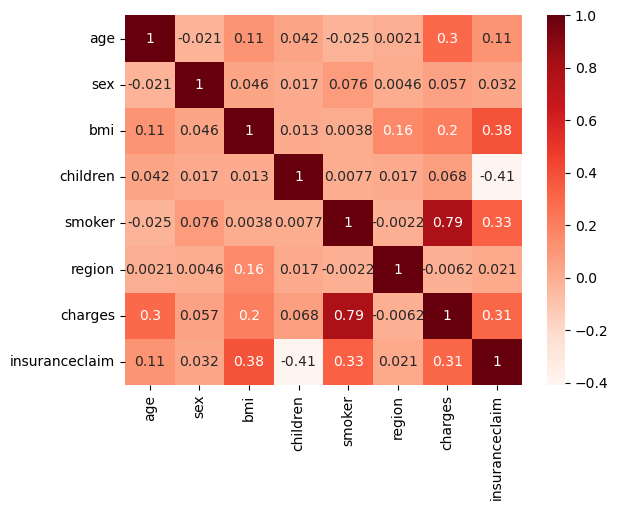

In [14]:
# Creating a matrix using age, sex, bmi, children, smoker, region, charges, insuranceclaim as rows and columns

data[['age', "sex", 'bmi','children','smoker','region','charges','insuranceclaim']].corr()
#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(data[['age', "sex", 'bmi','children','smoker','region','charges','insuranceclaim']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [15]:
# here through heat map and corelation score it is easy to find the feature to built the model for target feature
# from the above data we will choose those feature having corelation score near -0.5 and +0.5
# thus our useful features to apply model are bmi(0.38), children(-0.41), smoker(0.33) and charges(0.31)

In [16]:
# now cleaning those features so that we can make our machine learning model more efficient

In [17]:
# finding outlaires using box plot for each usefull feature & smoker is the column with data yes(1)/no(0) therefore no outlair can be found in smoker


C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


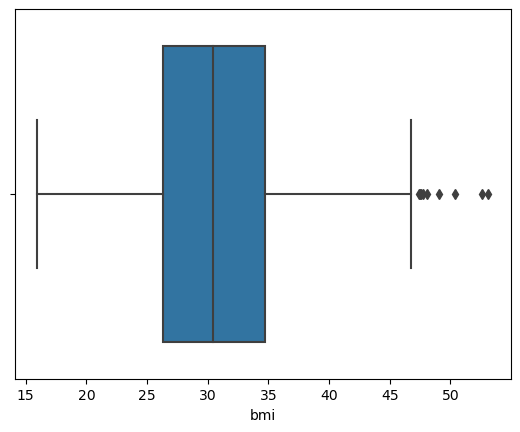

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


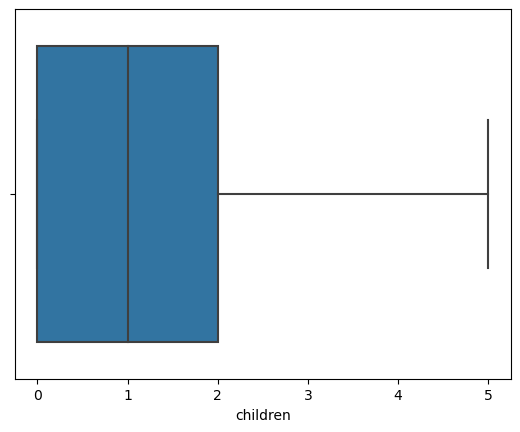

C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


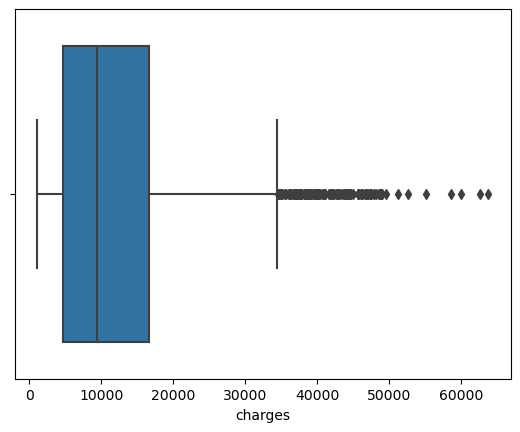

In [18]:
sns.boxplot(df['bmi'])
plt.show()
sns.boxplot(df['children'])
plt.show()
sns.boxplot(df['charges'])
plt.show()


In [19]:
# here we find there are many outlairs for the bmi and charges feature
# now removing outlairs one by one by using iqr mathod

Old Shape:  (1338, 8)
47.265 13.725000000000005


C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


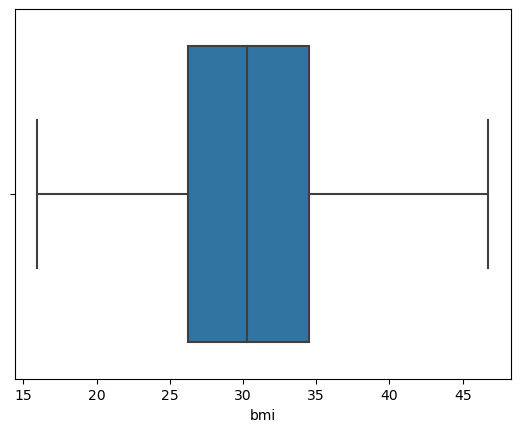

In [20]:
Q1BMI = np.percentile(df['bmi'], 25,interpolation = 'midpoint')
 
Q3BMI = np.percentile(df['bmi'], 75,interpolation = 'midpoint')
IQR1 = Q3BMI - Q1BMI
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper1=Q3BMI+1.5*IQR1
upper_array=np.array(df['bmi']>=upper1)
# Lower bound
lower1=Q1BMI-1.5*IQR1
lower_array=np.array(df['bmi']<=lower1)
print(upper1,lower1)
ndf=df[df["bmi"]<upper1]
sns.boxplot(ndf['bmi'])
plt.show()


Old Shape:  (1110, 8)
23478.585975 -7446.539825


C:\Users\gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


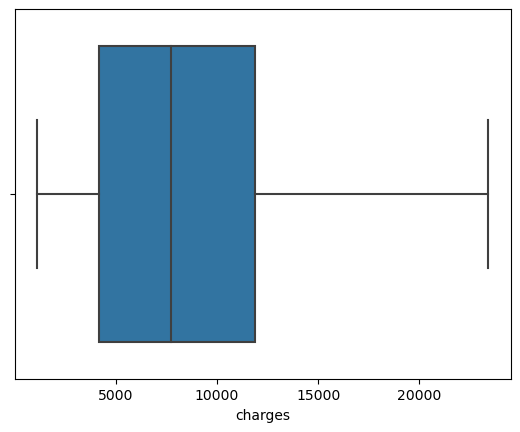

In [48]:
Q1CHG = np.percentile(ndf['charges'], 25,interpolation = 'midpoint')
 
Q3CHG = np.percentile(ndf['charges'], 75,interpolation = 'midpoint')
IQR2 = Q3CHG - Q1CHG
 
print("Old Shape: ", ndf.shape)
 
# Upper bound
upper2=Q3CHG+1.5*IQR2
upper_array2=np.array(ndf['charges']>=upper2)
# Lower bound
lower2=Q1CHG-1.5*IQR2
lower_array2=np.array(ndf['charges']<=lower2)
print(upper2,lower2)
ndf=ndf[ndf["charges"]<upper2]
ndf=ndf[ndf["charges"]>lower2]
sns.boxplot(ndf['charges'])
plt.show()

In [49]:
#now we can scale our data 

In [50]:
from sklearn.preprocessing import MinMaxScaler
# initialize scaler
normalizer = MinMaxScaler()
# fit on data
normalizer.fit(ndf)
# transform
tdf = normalizer.transform(ndf)
# save into diff data
tdf = pd.DataFrame(tdf)


In [51]:
tdf.head()

,0,1,2,3,4,5,6,7
0,0.021739,0.0,0.387788,0.0,1.0,1.000000,0.707516,1.0
1,0.000000,1.0,0.578435,0.2,0.0,0.666667,0.027096,1.0
2,0.217391,1.0,0.553426,0.6,0.0,0.666667,0.149357,0.0
3,0.326087,1.0,0.219065,0.0,0.0,0.333333,0.936406,0.0
4,0.304348,1.0,0.419617,0.0,0.0,0.333333,0.123207,1.0


In [52]:
# after removing the outlairs now defining the taring tet and target matrices

In [53]:
X = tdf.iloc[:,[2,3,4,6]].values
y = tdf.iloc[:,[7]].values

In [54]:
# spliting data into teat train

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 10)

In [56]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (832, 4)
X_test :  (278, 4)
y_train :  (832, 1)
y_test :  (278, 1)


In [57]:
# applying logestic regression model 

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [60]:
# defining prediction matrix

In [61]:
y_pred = lr.predict(X_test)
y_pred

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1.

In [62]:
# defining and calculating accuracy matrix

In [63]:
acc = lr.score(X_test,y_test)
acc

0.8812949640287769

# Thus we get the accuracy of the logesstic regression model is 88.12%  

# In order to maximize the accuracy, we are now going to implement decission tree model 

In [64]:
# as we already done with the EDA part and applied logestic regression model succesfully 
# therefore we can continue from the cell before we applied the model logestic regression

In [65]:
# importing Decission Tree
from sklearn.tree import DecisionTreeRegressor

In [66]:
# model impletation
reg = DecisionTreeRegressor()
# fitting
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [67]:
# predicting

y_pred = reg.predict(X_test)
y_pred

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1.

In [68]:
# calculate RMSE

rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

0.1989179361539351


In [69]:
# error
error = abs(y_pred-y_test)
error

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [70]:
acc_dt = metrics.accuracy_score(y_test,y_pred)

print("Accuracy : ",acc_dt)

Accuracy :  0.960431654676259


# Thus we get the accuracy of the Decission Tree model is 96.04%